# Assignment: More Matplotlib
### Phyllis Kho

## Problem 1: Line plots

In this problem, we will plot some daily weather data from a NOAA station in Millbrook, NY. A full description of this dataset is available at: https://www.ncdc.noaa.gov/data-access/land-based-station-data

The cell below uses pandas to download the data and populate a bunch of numpy arrays (t_daily_min, t_daily_max, etc.) Run the cell and then use the numpy arrays to try to re-create the plot you see.

In [27]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [28]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


In [29]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

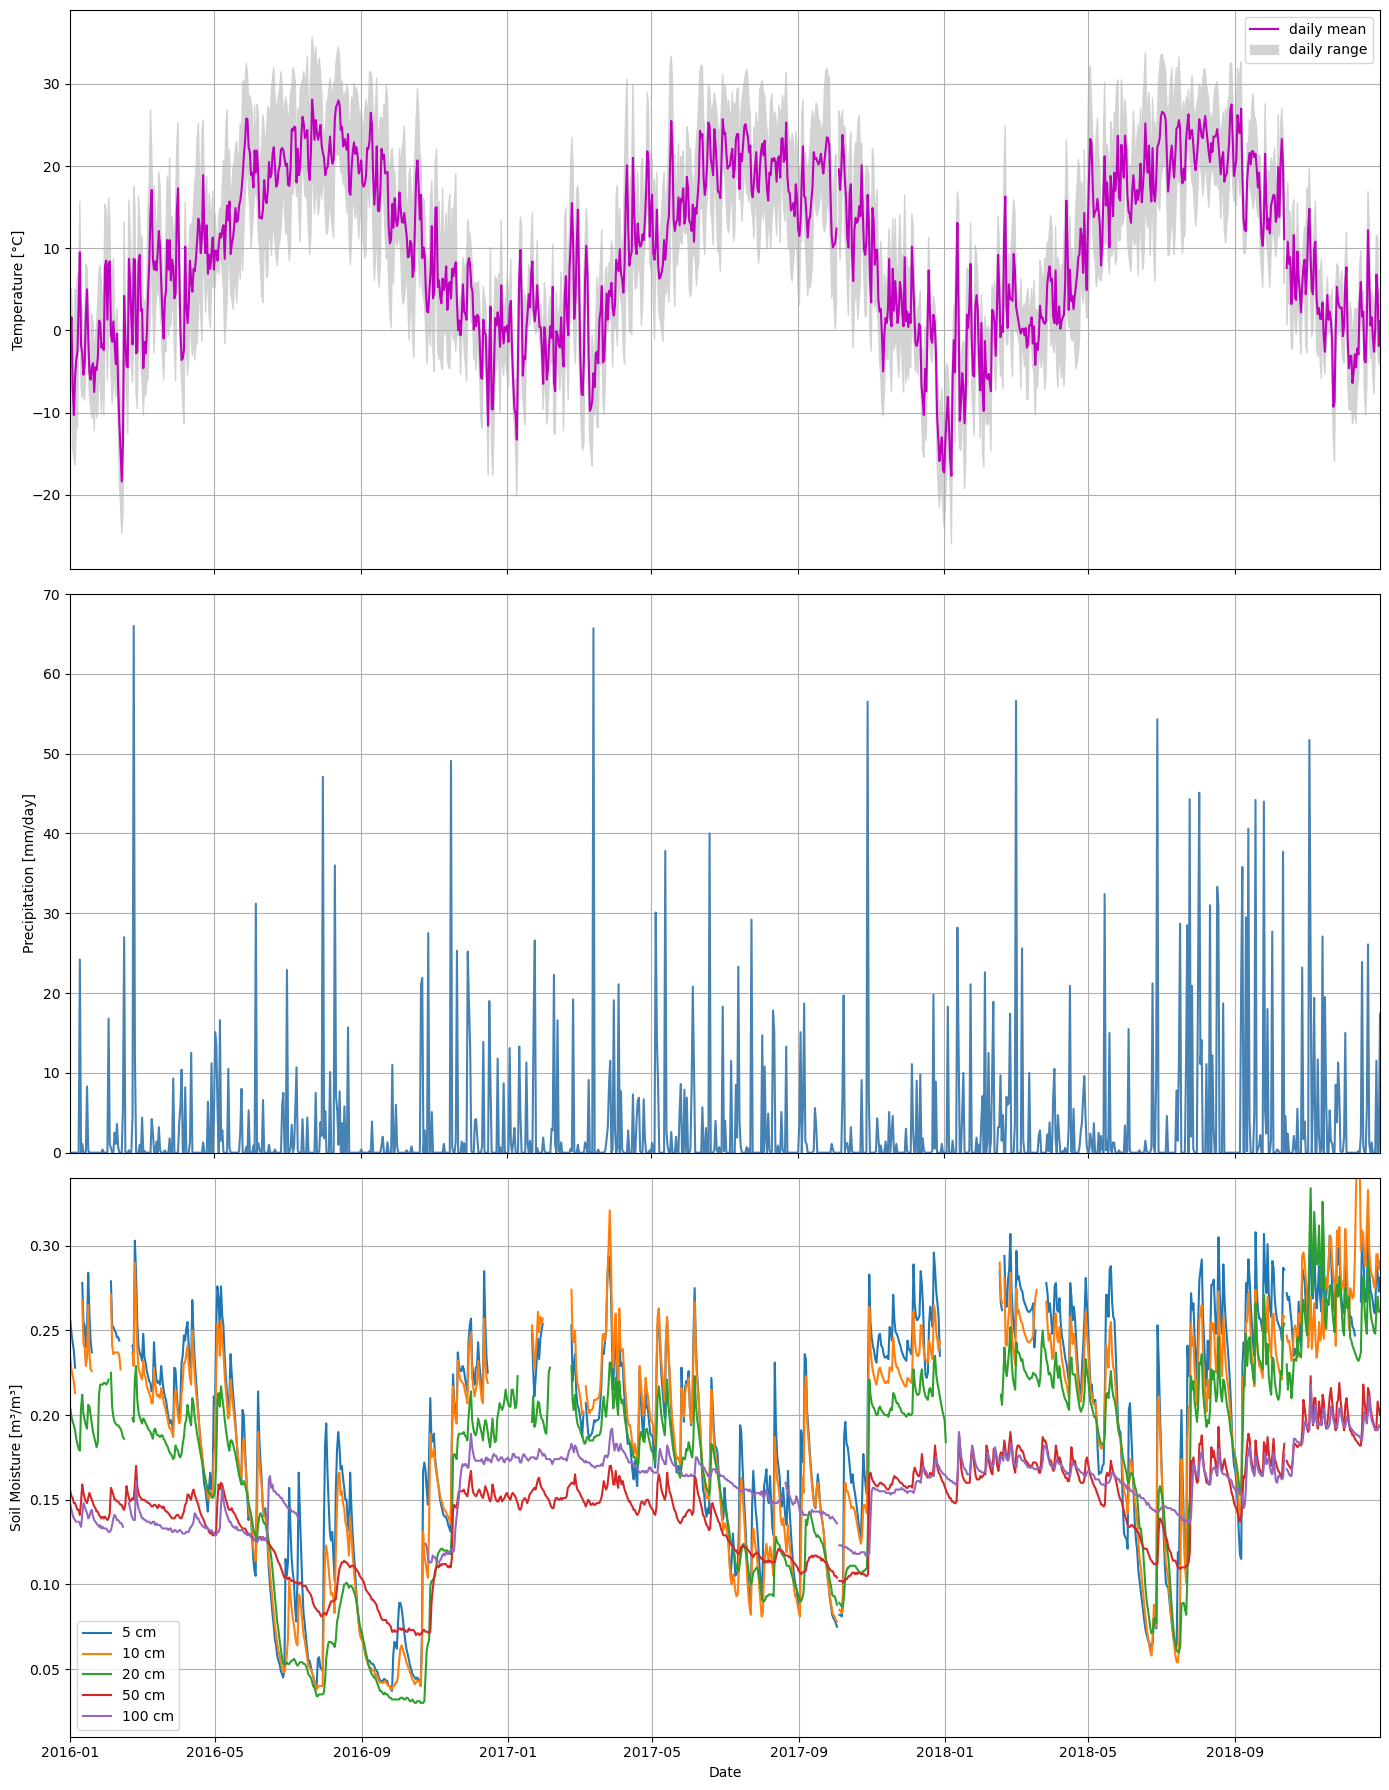

In [42]:
fig, axes = plt.subplots(figsize=(14, 18), nrows =3);

axes[0].plot(date, t_daily_mean, color='m', label='daily mean')
axes[0].fill_between(date, t_daily_max, t_daily_min, color='lightgray', label='daily range')
axes[0].legend()
axes[0].set_ylabel('Temperature [°C]');
axes[0].grid(which='major', linestyle = '-');
axes[0].set_xlim(date[1], date[-1]);
axes[0].set_xticklabels([])
axes[0].set_ylim(-29, 39);
#axes[0].set_yticks(np.array([0, =20, =10, 10, 0, 20, 30]));


axes[1].plot(date, p_daily_calc, color='steelblue')
axes[1].set_ylabel('Precipitation [mm/day]');
axes[1].grid(which='major', linestyle = '-');
axes[1].set_xlim(date[1], date[-1]);
axes[1].set_ylim(0, 70);
axes[1].set_xticklabels([]);

axes[2].plot(date, soil_moisture_5, label='5 cm')
axes[2].plot(date, soil_moisture_10, label='10 cm')
axes[2].plot(date, soil_moisture_20, label='20 cm')
axes[2].plot(date, soil_moisture_50, label='50 cm')
axes[2].plot(date, soil_moisture_100, label='100 cm')
axes[2].legend()
axes[2].set_ylabel('Soil Moisture [m³/m³]');
axes[2].set_ylim(0.01, 0.34);
axes[2].grid(which='major', linestyle = '-');
axes[2].set_xlim(date[0], date[-1]);
axes[2].set_xlabel('Date');

plt.tight_layout()

## Problem 2: Contour Plots
Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis

In [ ]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

In [43]:
import netCDF4
import pydap

In [44]:
zonal_T_nanmean = np.nanmean(temp, axis = 1)

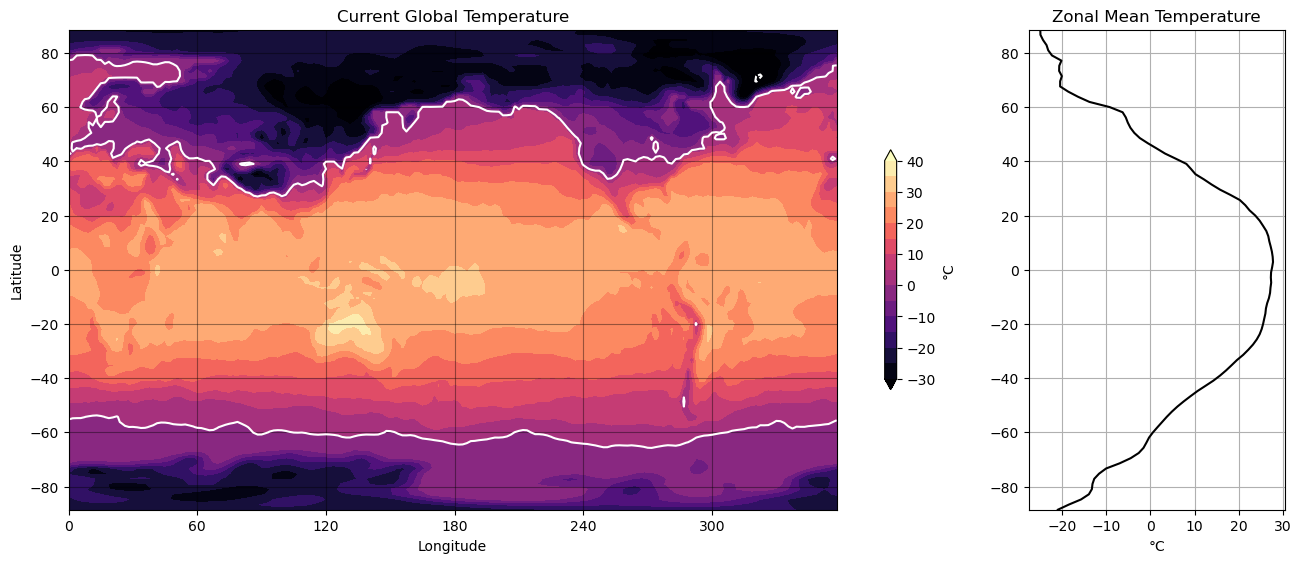

In [58]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1.5, 1])
Current_Global_Temperature = ax1.contourf(lon, lat, temp, levels=np.arange(-30, 41, 5), cmap='magma', extend = 'both');
ax1.set_title('Current Global Temperature');
ax1.set_ylabel('Latitude');
ax1.set_xlabel('Longitude');
ax1.set_xticks(np.array([0, 60, 120, 180, 240, 300]));
colorbar = fig.colorbar(Current_Global_Temperature, ax=ax1, shrink=0.5);
colorbar.set_label('°C');
ax1.grid(which='major', linestyle='-', color ='k', alpha=0.4);
ax1.contour(lon, lat, temp, levels=1, colors='w');

ax2 = fig.add_axes([1.5, 0, 0.4, 1])
ax2.plot(zonal_T_nanmean, lat, color ='k');
ax2.set_title('Zonal Mean Temperature');
ax2.set_ylim(ax1.get_ylim());
ax2.set_xlabel('°C');
ax2.grid(which='major', linestyle = '-');

## Problem 3: Scatter plots
Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude
/100



In [46]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

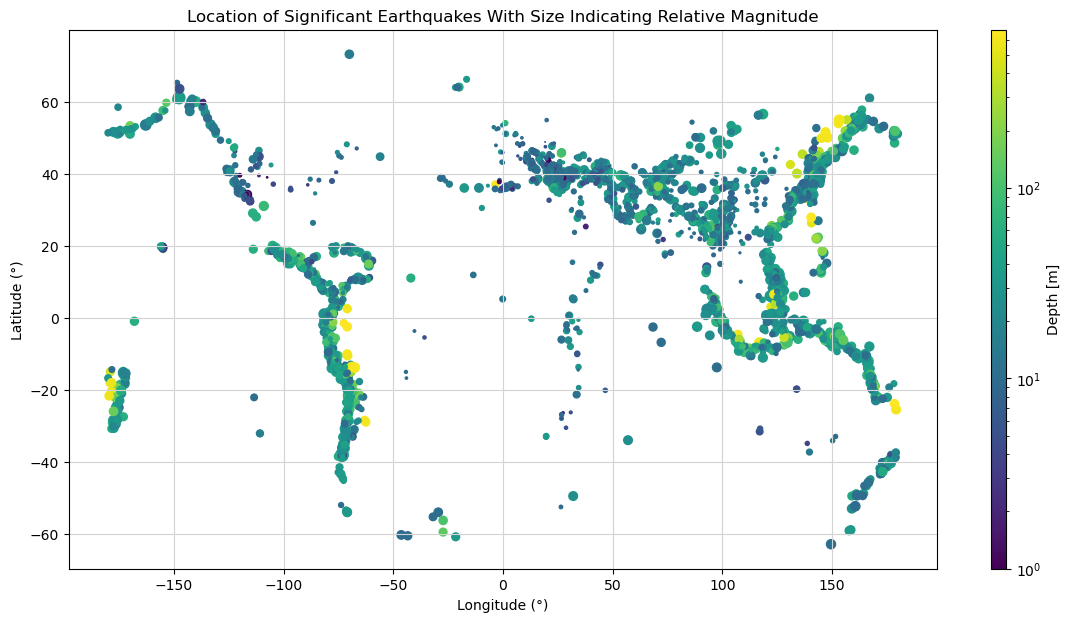

In [54]:
fig, ax = plt.subplots(figsize=(14,7))
earthquake_scatter = ax.scatter(longitude, latitude, c=depth, s=(magnitude**4)/100, cmap='viridis', norm=matplotlib.colors.LogNorm())
ax.set_title('Location of Significant Earthquakes With Size Indicating Relative Magnitude');
ax.set_ylabel('Latitude (°)');
ax.set_xlabel('Longitude (°)');
ax.grid(which='major', linestyle = '-', color ='lightgray');
plt.colorbar(earthquake_scatter, label ='Depth [m]', aspect = 35);
